## 1. fetch one month of data of coronavirus from twitter before it's outbreak and after outbreak and compare peoples emotion

In [17]:
import string
from collections import Counter
import matplotlib.pyplot as plt

In [18]:
def get_tweets(from_date, to_date):
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('coronavirus') \
        .setSince(from_date) \
        .setUntil(to_date) \
        .setMaxTweets(200)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [19]:
def text_cleaning(text_tweets):
    # reading text file
    text = ""
    
    length = len(text_tweets)

    for i in range(0, length):
        text = text_tweets[i][0] + " " + text

    # converting to lowercase
    lower_case = text.lower()

    # Removing punctuations
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

    # splitting text into words
    tokenized_words = cleaned_text.split()
    
    return tokenized_words

In [20]:
def text_preprocesing(tokenized_words):
    from nltk.corpus import stopwords
    # Removing Stop Words
    final_words = []

    for word in tokenized_words:
        if word not in stopwords.words('english'):
            final_words.append(word)

    # Lemmatization - From plural to single + Base form of a word (example better-> good)
    from nltk.stem import WordNetLemmatizer
    lemma_words = []

    for word in final_words:
        word = WordNetLemmatizer().lemmatize(word)
        lemma_words.append(word)
    return lemma_words  

In [21]:
def text_emotions(final_words):
    # Get emotions text
    emotion_list = []
    with open('emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
            word, emotion = clear_line.split(':')
            if word in final_words:
                emotion_list.append(emotion)

    w = Counter(emotion_list)
    return (w)

### one month of data of coronavirus from twitter before it's outbreak

Counter({' happy': 3, ' sad': 2, ' fearful': 2, ' attracted': 1, ' free': 1, ' average': 1, ' derailed': 1})


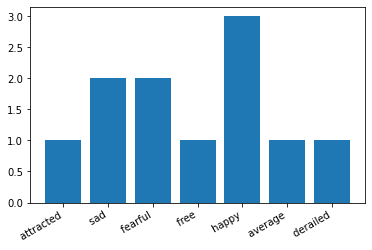

In [22]:
text_tweets_before = get_tweets("2020-03-01","2020-03-31")
tokenized_words = text_cleaning(text_tweets_before)
final_text_before = text_preprocesing(tokenized_words)
emotion_text_before = text_emotions(final_text_before)
print(emotion_text_before)
fig, ax1 = plt.subplots()
ax1.bar(emotion_text_before.keys(), emotion_text_before.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

### one month of data of coronavirus from twitter after it's outbreak

Counter({' adequate': 2, ' free': 2, ' sad': 2, ' angry': 1, ' attracted': 1, ' safe': 1, ' happy': 1})


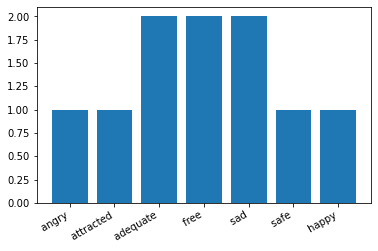

In [23]:
text_tweets_after = get_tweets("2020-05-01","2020-05-31")
tokenized_words = text_cleaning(text_tweets_after)
final_text_after = text_preprocesing(tokenized_words)
emotion_text_after = text_emotions(final_text_after)
print(emotion_text_after)
fig, ax1 = plt.subplots()
ax1.bar(emotion_text_after.keys(), emotion_text_after.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

### compare peoples emotion before and after breakdown

## 2. Update the emotion document  and Analyse the sentiments of people

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [29]:
def clean_text(text_tweets):
    # reading text file
    text = ""    
    length = len(text_tweets)

    for i in range(0, length):
        text = text_tweets[i][0] + " " + text

    # converting to lowercase
    lower_case = text.lower()

    # Removing punctuations
    cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
    
    return cleaned_text

In [43]:
def update_text_emotions (final_words):
    # Get emotions text
    new_text_list = []
    with open('emotions.txt', 'r') as file:
        for line in file:
            clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
            word, emotion = clear_line.split(':')
        for new_word in final_words:
            if new_word not in word:
                new_text_list.append(new_word)

    return (new_text_list)

In [37]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        print (sia.polarity_scores(sentiment_text))
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
        print (sia.polarity_scores(sentiment_text))
    else:
        print("Neutral Sentiment")
        print (sia.polarity_scores(sentiment_text))

#### A. before outbreak

In [49]:
update_words = update_text_emotions(final_text_before)
sentiment_analyse(clean_words)

Neutral Sentiment
{'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': 0.6899}


In [46]:
len(update_words)

3216

#### B. after outbreak

In [39]:
clean_words = clean_text(text_tweets_after)
sentiment_analyse(clean_words)

Neutral Sentiment
{'neg': 0.061, 'neu': 0.878, 'pos': 0.061, 'compound': 0.6899}


In [50]:
update_words = update_text_emotions(final_text_after)
len(update_words)

3558

### 3. pick document (say A) and create BOW using a count vectorizer. Use another document (say B) and identify how many words of the B document are present in the BOW of A.

In [51]:
#common word in both document A and B
common_word =[]
for word in final_text_after:
    if word not in final_text_before:
        if len(word)>3:
            common_word.append(word)
    

In [53]:
#no. of words of the B document are present in the BOW of A
len(common_word)

1584